Pré-processamento

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mplt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import  (confusion_matrix, classification_report, ConfusionMatrixDisplay,
                              precision_score, recall_score, f1_score)
from sklearn.pipeline import Pipeline
from sklearn.utils import shuffle
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler


SEED = 1
np.random.seed(SEED)

# Feito e executado no Google Colab
df = pd.read_csv('/content/star_classification.csv')

df = df.drop(columns=['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID',
                      'plate', 'MJD', 'fiber_ID'])

x = df.drop(columns=['class'])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['class']) # Transforma os dados da coluna 'class' em int e guarda em y

results = {} # Guardará os resultados de métricas de cada modelo

# Validação cruzada  mantendo a proporção das classes,
# e fazendo com que cada modelo seja treinado e testado com os mesmos dados
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)


Modelo 1 - Support Vector Machine (SVM)




Resultados para o SVM com C = 100 e kernel = rbf




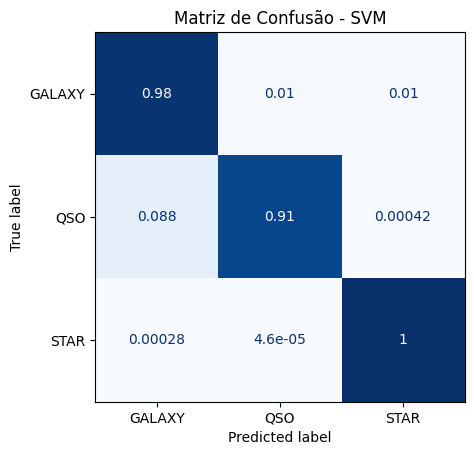


Resultados das métricas:

              precision    recall  f1-score   support

      GALAXY      0.972     0.979     0.976     59445
         QSO      0.966     0.912     0.938     18961
        STAR      0.972     1.000     0.985     21594

    accuracy                          0.971    100000
   macro avg      0.970     0.964     0.966    100000
weighted avg      0.971     0.971     0.971    100000

Precisão: 0.970
Recall: 0.964
F1-Score: 0.966


In [13]:
from sklearn.svm import SVC


# Pipeline com normalização e SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=100, random_state=SEED))])

# Executa validação cruzada e retorna as previsões do modelo
y_pred_svm = cross_val_predict(pipeline_svm, x, y, cv=skfold, n_jobs=-1)

print ("Resultados para o SVM com C = 100 e kernel = rbf\n\n")

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y, y_pred_svm, display_labels=label_encoder.classes_,
                                        cmap='Blues', colorbar = False, normalize='true')
mplt.title('Matriz de Confusão - SVM')
mplt.show()

print("\nResultados das métricas:\n")
print(classification_report(y, y_pred_svm, target_names=label_encoder.classes_, digits=3))

# Cálculo das métricas em valor médio.
precision = precision_score(y, y_pred_svm, average='macro')
recall = recall_score(y, y_pred_svm, average='macro')
f1 = f1_score(y, y_pred_svm, average='macro')

print(f"Precisão: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

# Guardar os resultados no dicionário.
results['SVM'] = {
    'precision': precision,
    'recall': recall,
    'f1_macro': f1,
}


Modelo 2 - Random Forest

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Resultados para o Random Forest com número de árvores = 500 e profundidade máxima = 14




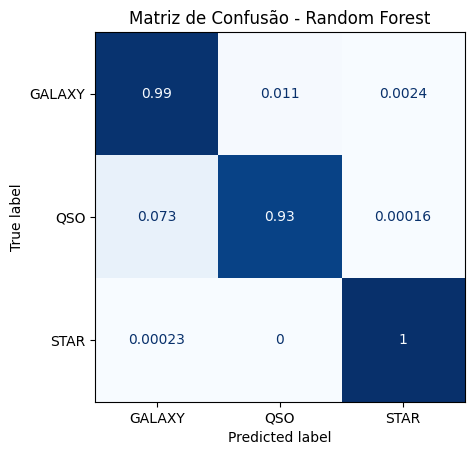


Resultados das métricas:

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     59445
         QSO       0.96      0.93      0.94     18961
        STAR       0.99      1.00      1.00     21594

    accuracy                           0.98    100000
   macro avg       0.98      0.97      0.97    100000
weighted avg       0.98      0.98      0.98    100000

Precisão: 0.978
Recall: 0.971
F1-Score: 0.974


In [15]:
from sklearn.ensemble import RandomForestClassifier


pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=500, max_depth=14, n_jobs=-1, random_state=SEED))])

y_pred_rf = cross_val_predict(pipeline_rf, x, y, cv=skfold, n_jobs=-1)

print("\nResultados para o Random Forest com número de árvores = 500 e profundidade máxima = 14\n\n")

ConfusionMatrixDisplay.from_predictions(y, y_pred_rf, display_labels=label_encoder.classes_,
                                        cmap='Blues', colorbar=False, normalize='true')

mplt.title('Matriz de Confusão - Random Forest')
mplt.show()

print("\nResultados das métricas:\n")
print(classification_report(y, y_pred_rf, target_names=label_encoder.classes_))

precision = precision_score(y, y_pred_rf, average='macro')
recall = recall_score(y, y_pred_rf, average='macro')
f1 = f1_score(y, y_pred_rf, average='macro')

print(f"Precisão: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

results['Random Forest'] = {
    'precision': precision,
    'recall': recall,
    'f1_macro': f1,
}


Modelo 3


Resultados para o XGBoost com número de árvores = 600, learning_rate = 0.1 e profundidade máxima = 8




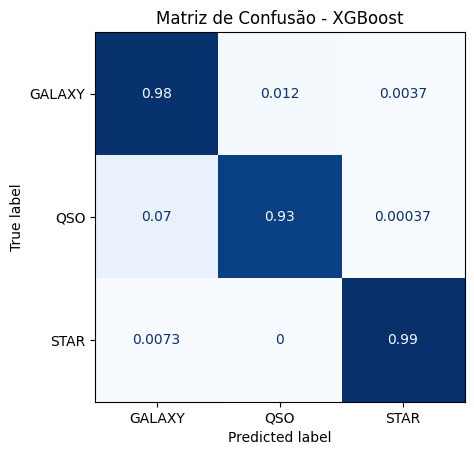


Resultados das métricas:

              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     59445
         QSO       0.96      0.93      0.95     18961
        STAR       0.99      0.99      0.99     21594

    accuracy                           0.98    100000
   macro avg       0.98      0.97      0.97    100000
weighted avg       0.98      0.98      0.98    100000

Precisão: 0.975
Recall: 0.969
F1-Score: 0.972


In [14]:
from xgboost import XGBClassifier


pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier( n_estimators=600, learning_rate=0.1,
                          max_depth=8, n_jobs=-1, random_state=SEED)) ])

y_pred_xgb = cross_val_predict(pipeline_xgb, x, y, cv=skfold, n_jobs=-1)

print("\nResultados para o XGBoost com número de árvores = 600, learning_rate = 0.1 e profundidade máxima = 8\n\n")

ConfusionMatrixDisplay.from_predictions(y, y_pred_xgb, display_labels=label_encoder.classes_,
                                        cmap='Blues', colorbar=False, normalize='true')

mplt.title('Matriz de Confusão - XGBoost')
mplt.show()

print("\nResultados das métricas:\n")
print(classification_report(y, y_pred_xgb, target_names=label_encoder.classes_))

precision = precision_score(y, y_pred_xgb, average='macro')
recall = recall_score(y, y_pred_xgb, average='macro')
f1 = f1_score(y, y_pred_xgb, average='macro')

print(f"Precisão: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")

results['XGBoost'] = {
    'precision': precision,
    'recall': recall,
    'f1_macro': f1,
}
